# Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Statistics Summary


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Statisticsal Summary for Numerical Features

In [3]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols = num_cols.drop('PassengerId')
print("Statistical summary for numerical features:")
print(df[num_cols].describe())

Statistical summary for numerical features:
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


##Statistical Summary for Categorical Features


In [4]:
#Statistical Summary for Categorical Features
cat_cols = df.select_dtypes(include=['object']).columns

print("Statistical summary for categorical features:")
print(df[cat_cols].describe())

Statistical summary for categorical features:
                       Name   Sex  Ticket Cabin Embarked
count                   891   891     891   204      889
unique                  891     2     681   147        3
top     Dooley, Mr. Patrick  male  347082    G6        S
freq                      1   577       7     4      644


#Data Visualization


##Creating histograms and boxplots for numeric features.

###Histograms

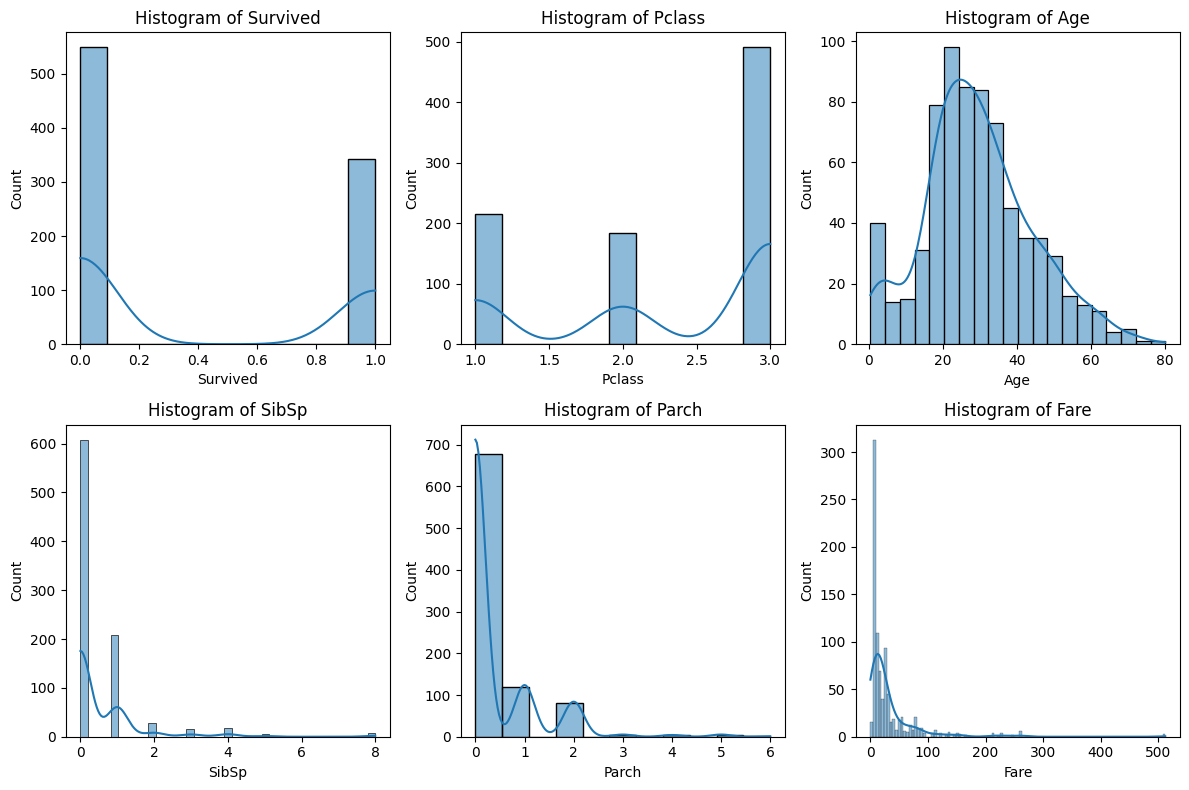

In [5]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

###Box plots

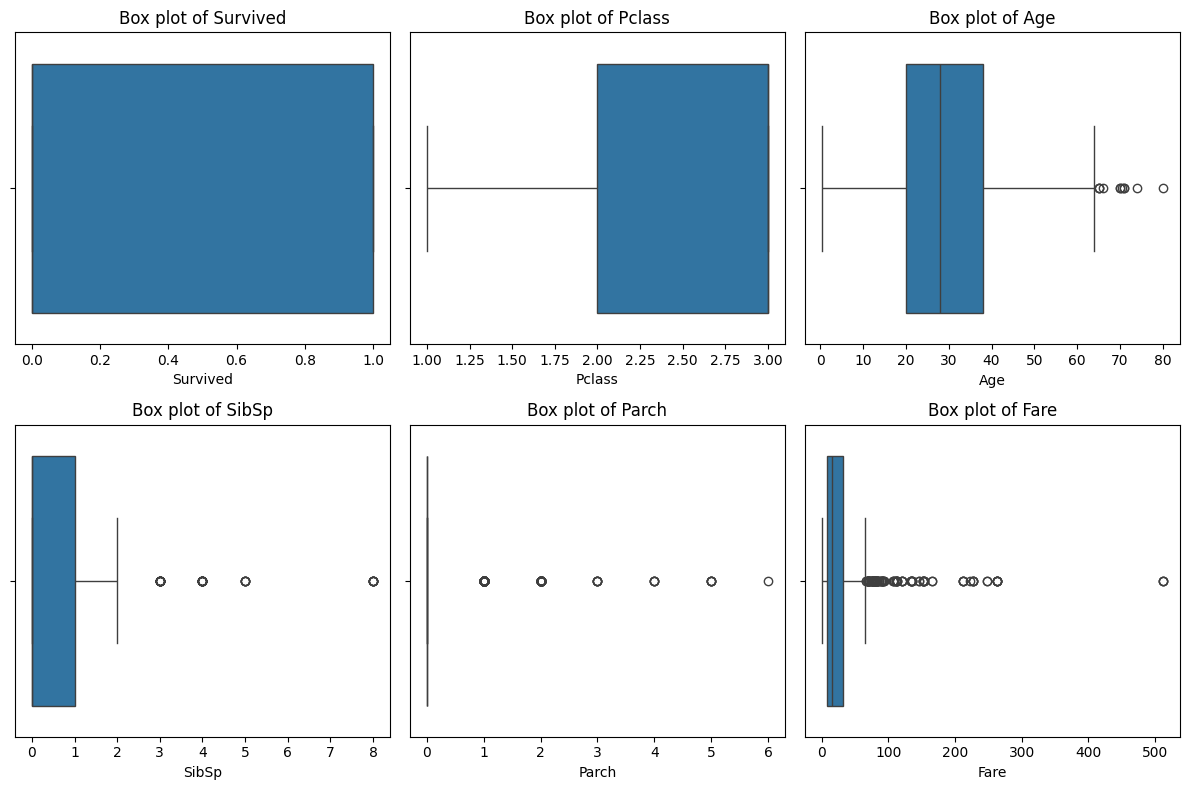

In [6]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

##Creating Pairplot and Correlation matrix for numrical feature relationships.

###Pairplot

<Figure size 1200x1200 with 0 Axes>

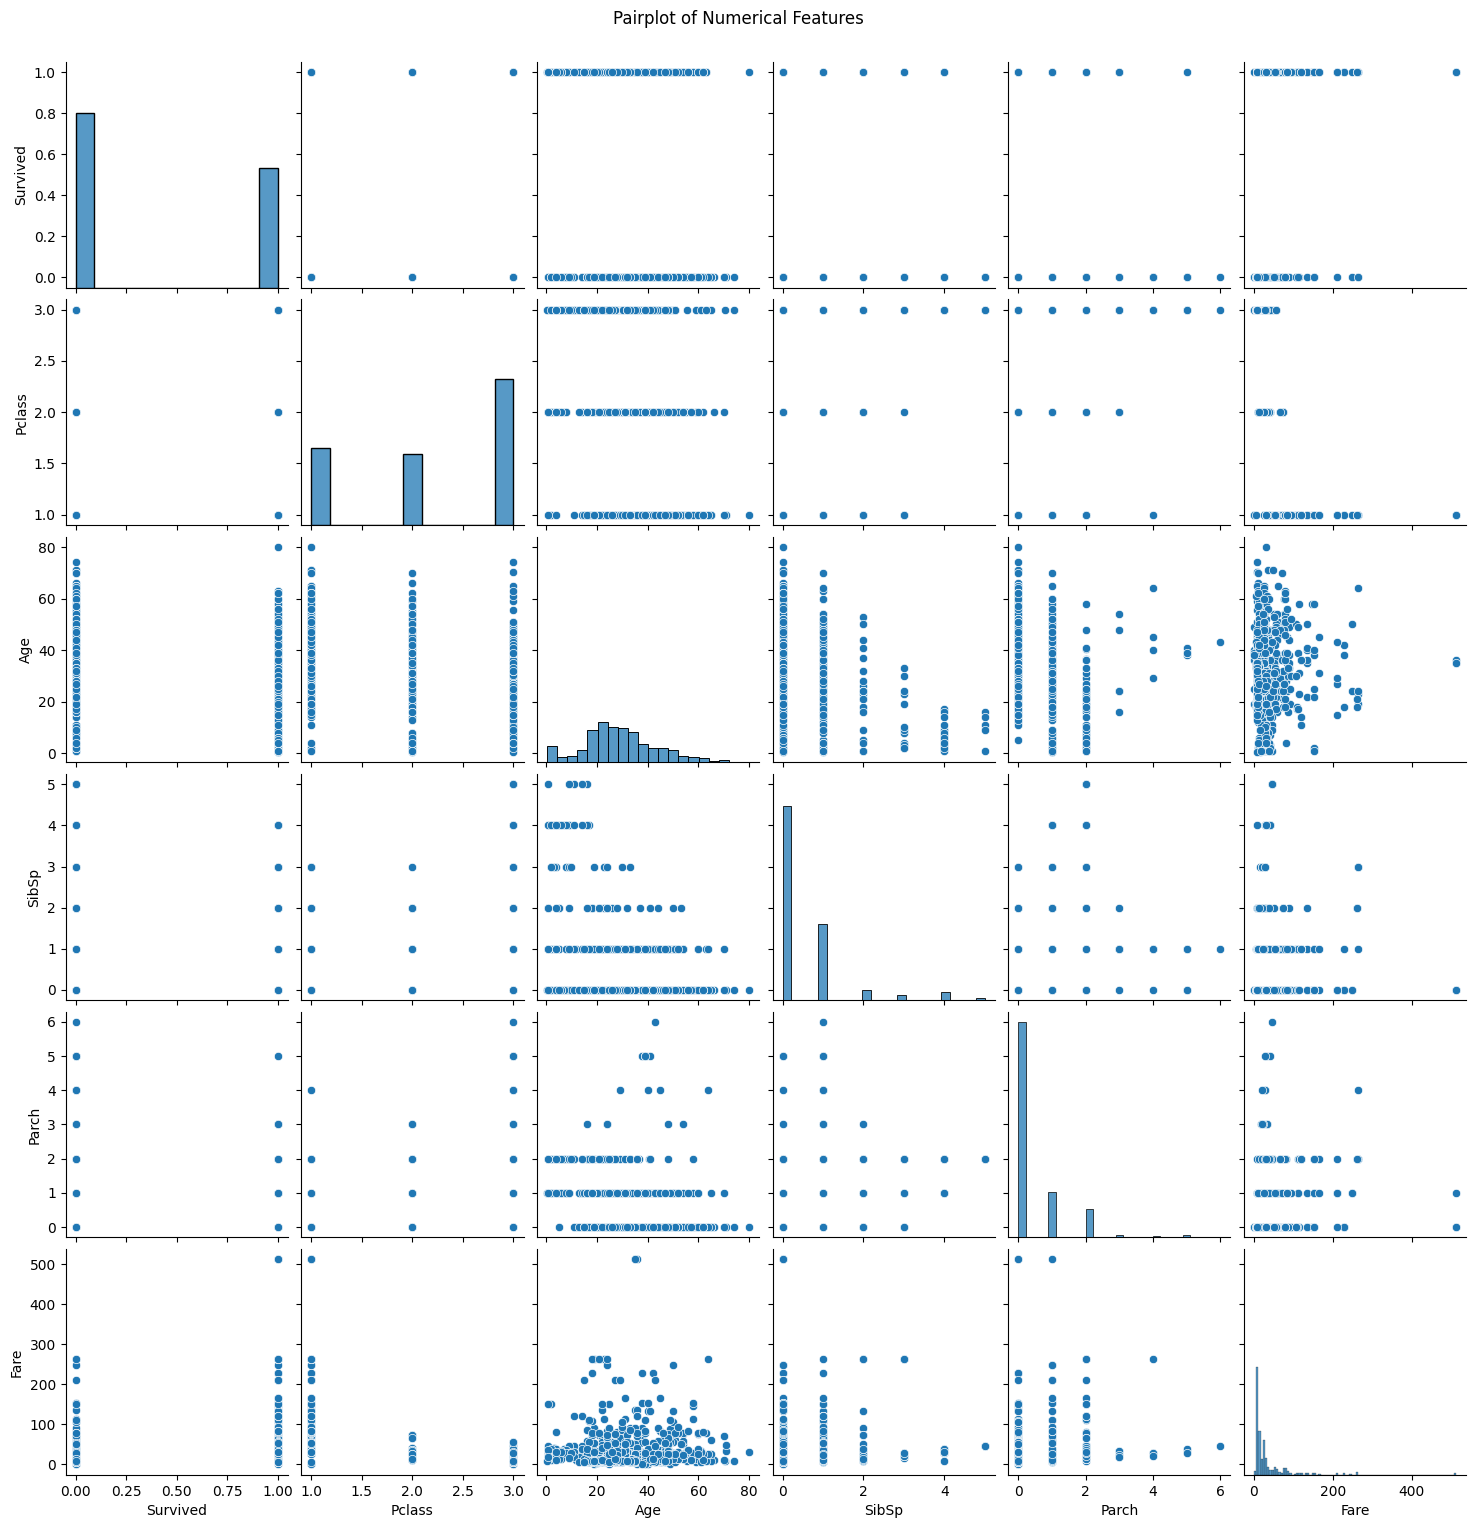

In [7]:
plt.figure(figsize=(12, 12))
sns.pairplot(df[num_cols].dropna())
plt.suptitle('Pairplot of Numerical Features', y=1.02)

plt.show()

###Correlation Matrix

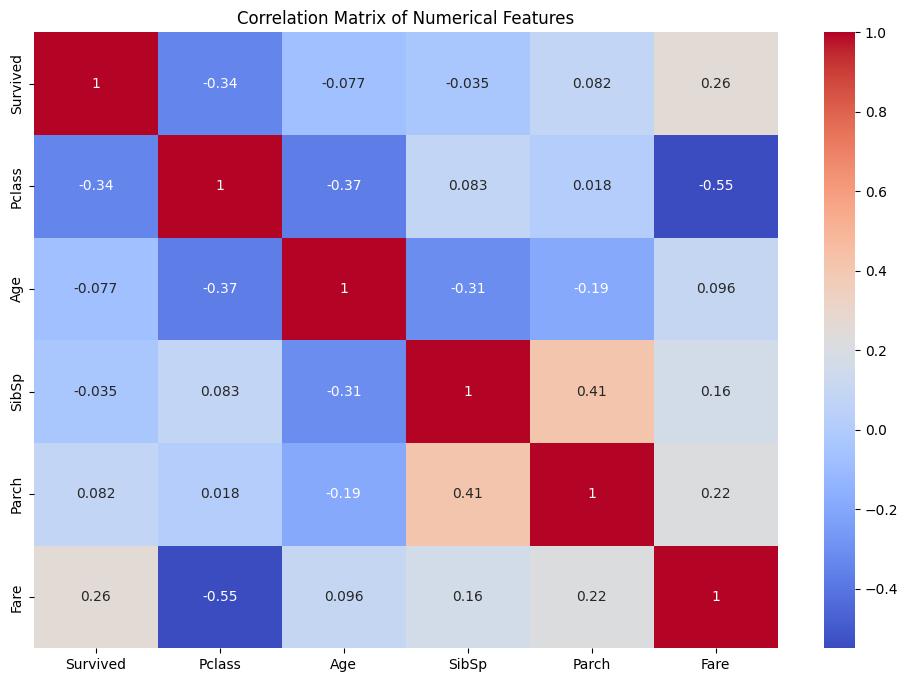

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Analysis

Based on the the visualizations the following inferences can be made for the given data:


*   **Age**: The distribution of age is skewed to the right, meaning that there are more younger person than old ones. Also the Box plot helps us find and remove the outliers. In this case, the older people can be termed as the outlers.
*   **Family Members**: The distributions and Box plots of SibSP and Parch indicate there were less family members on the ship. The passengers that have come with their family can be classified as outliers here.
*   **Fare**: The Fare distribution is heavily skewed to the right, indicating that most people paid for low fare tickets. However, there are some people who have paid significantly extra for the tickets. These may be classified as outliers.



